## Let's evaluate your body

Through this dataset, gathered by the National Sports Promotion Foundation in commemoration of the Seoul Olympics, we will process our data, clean it, apply various statistical methods to the data, derive insightful outcomes about physical fitness and finally create our own classification model to predict the class of an individual's body type based on imperative features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### Understanding our features
1. age, gender, height_cm, weigh_kg, bodyfat % are self-explanatory
2. diastolic and systolic are measurements of blood pressure
   
##### Blood pressure is the pressure of blood pushing against the walls of your arteries. <br> <br>
The first number, called systolic blood pressure, measures the pressure in your arteries when your heart beats.<br><br>The second number, called diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.<br> <br>A normal blood pressure level is less than 120/80 mmHg

In [3]:
df.shape

(13393, 12)

In [4]:
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

In [5]:
df_numeric_data = df.select_dtypes(exclude="object")
df_numeric_data.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


### Descriptive statistics for our data (at a glance)

In [6]:
df_numeric_data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [7]:
df_numeric_data.mode()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,21.0,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0


Our data has a higher frequency of people of age 21, height 170cm, weight 70.5kgs and so on

### Visualizing skewness of features (if it exist)

Skewness helps us understand the abnormal spread of our data

It helps us understand the distribution of our data points through which we cna identify if our dataset is imbalanced

<AxesSubplot: title={'center': 'Distribution of age'}, ylabel='Density'>

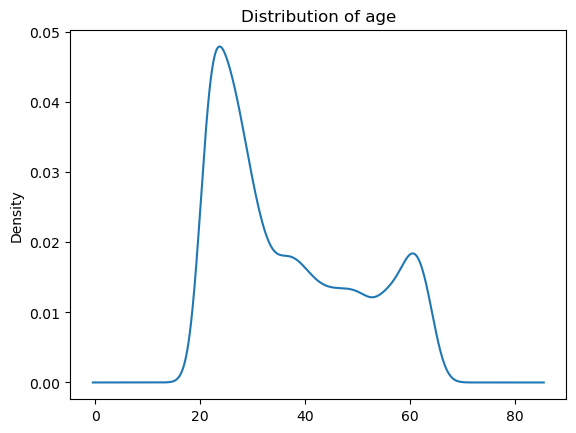

In [8]:
df["age"].plot(kind='kde', title="Distribution of age")

Since the tail of our distribution is towards the right, the "age" variable is positively skewed.
The maximum number of our samples have age betweeen 20-30
When we create our model, naturally it will be trained more rigorously with samples of age between 20 and 30

Let us now calculate the skewness for each feature in our dataframe

In [9]:
df.skew().sort_values(ascending=False)

sit and bend forward_cm    0.785492
age                        0.599896
body fat_%                 0.361132
weight_kg                  0.349805
gripForce                  0.018456
systolic                  -0.048654
diastolic                 -0.159637
height_cm                 -0.186882
broad jump_cm             -0.422623
sit-ups counts            -0.467830
dtype: float64

In [10]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### Understanding our features

##### Let''s take a look at the relationship between body fat percentage and weight of individuals
It might be that they are correlated?

We can find this relationship using Pearson's correlation coefficient

##### Pearson's correlation coefficient is used to summarize the presence of linear relationship between features

But first we need to make sure both our variables follow a Gaussian-like distribution

<AxesSubplot: title={'center': 'Distribution of Body Fat Percentage'}, ylabel='Density'>

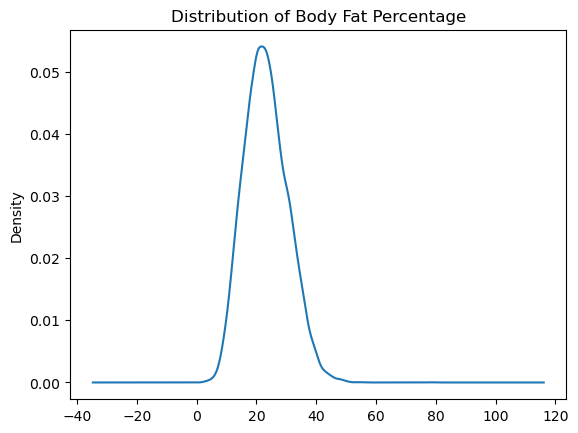

In [11]:
df["body fat_%"].plot(kind='kde', title="Distribution of Body Fat Percentage")

<AxesSubplot: title={'center': 'Distribution of Weight'}, ylabel='Density'>

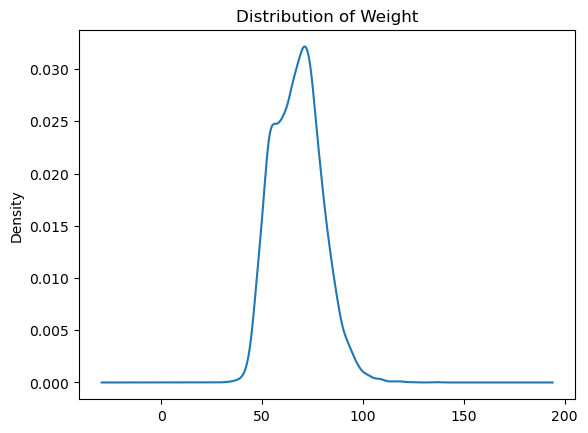

In [12]:
df["weight_kg"].plot(kind='kde', title="Distribution of Weight")

##### We do have a Gaussian-like distribution for both variables

In [13]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["body fat_%"], df["weight_kg"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.084


<AxesSubplot: xlabel='weight_kg', ylabel='body fat_%'>

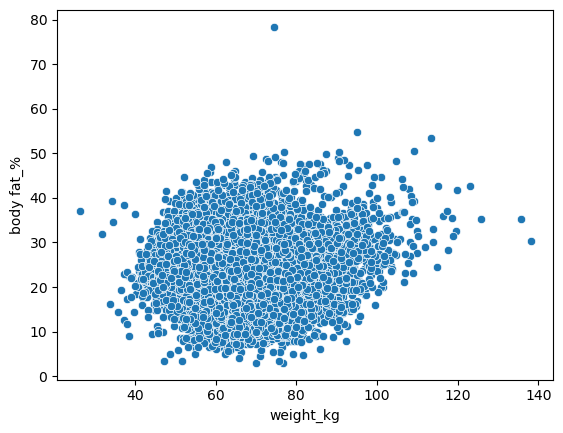

In [14]:
sns.scatterplot(data=df, x="weight_kg", y="body fat_%")

Pearson's correlation coefficient indicated that there is a small amount of correlation between our variables

It can also be seen in the above scatterplot

In [15]:
from scipy.stats import spearmanr
corr, _ = spearmanr(df["body fat_%"], df["weight_kg"])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.156


#### After interpreting bpth of our co-efficients we can say that there is not a strong correlation between  body fat percentage and weight of individuals

In [16]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


##### Let's explore our categorical features

#### Gender

<AxesSubplot: xlabel='gender', ylabel='count'>

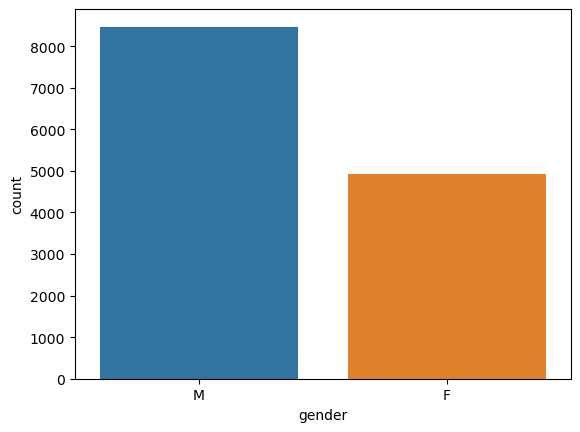

In [17]:
sns.countplot(data=df, x="gender")

We have half the number of females as comapred to males.

#### Class (Body Type)

<AxesSubplot: xlabel='class', ylabel='count'>

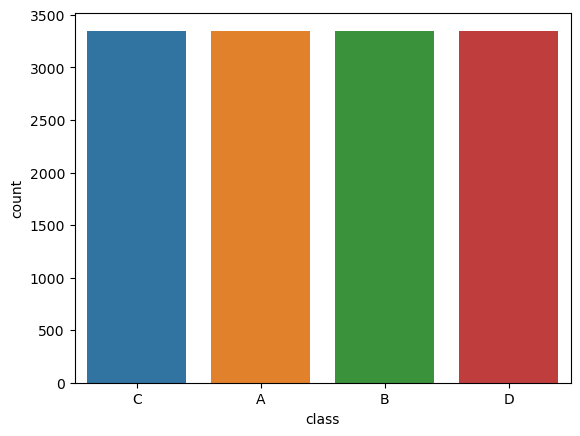

In [18]:
sns.countplot(data=df, x="class")

Good news! We have an equal amout of all 4 type of body types

#### Gender and Body Fat Percentage

<AxesSubplot: xlabel='body fat_%', ylabel='gender'>

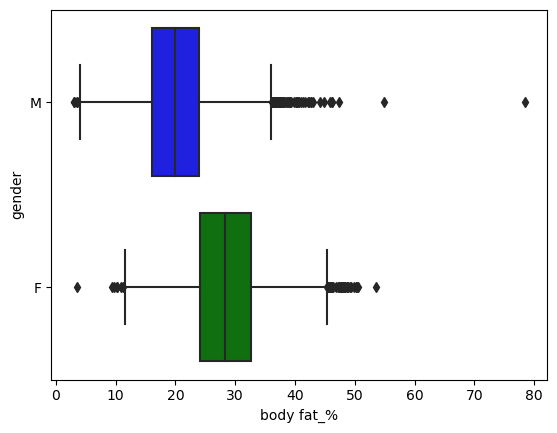

In [19]:
sns.boxplot(x='body fat_%', y='gender',data=df, palette={"M":"blue", "F":"green"})

1. The body fat percentage distribution between our genders is different as their means are (no significantly) far from each other
2. We can see the presence of an outlier in our body fat percenatge for males
3. Body fat percentage for each gender seems to be normally distributed

#### Age vs Body Type

What is the density of body types spread across ages of individuals?

<AxesSubplot: xlabel='Age', ylabel='Density'>

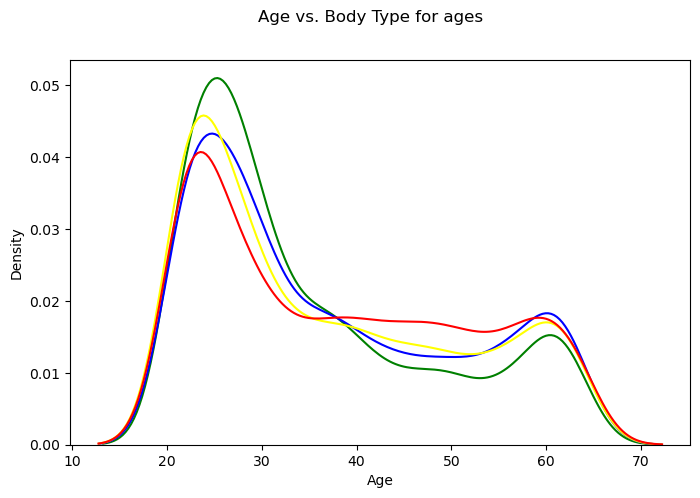

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Body Type for ages");

sns.kdeplot(df[df["class"]=="A"]["age"], color="green", label="Type A")
sns.kdeplot(df[df["class"]=="B"]["age"], color="blue", label="Type B")
sns.kdeplot(df[df["class"]=="C"]["age"], color="yellow", label="Type C")
sns.kdeplot(df[df["class"]=="D"]["age"], color="red", label="Type D")


#### Gender vs Body Type

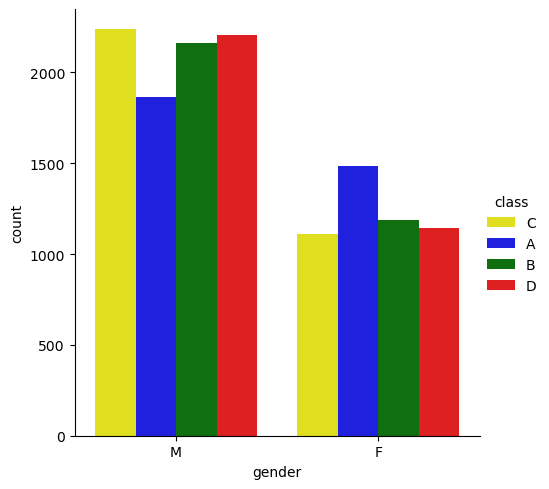

In [21]:
fig.suptitle("Gender vs. Body Type Count");
sns.catplot(x="gender", hue="class", data=df, kind="count", 
            palette={"A":"blue", "B":"green", "C":"yellow", "D":"red"})

<AxesSubplot: xlabel='weight_kg', ylabel='sit-ups counts'>

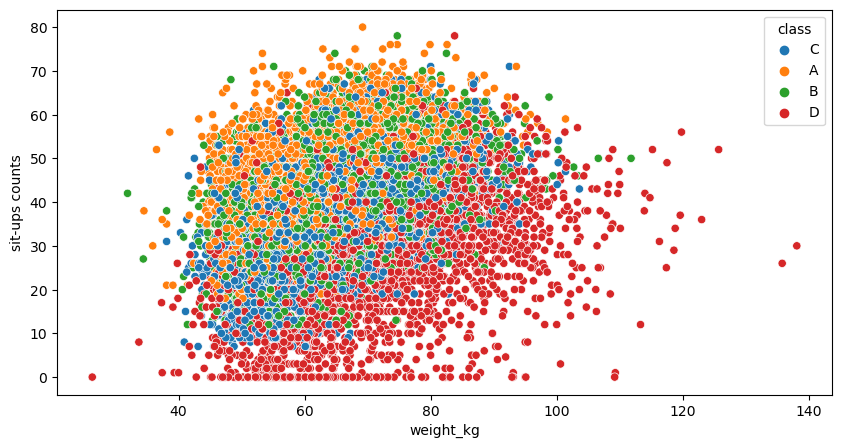

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x="weight_kg", y="sit-ups counts", data=df, hue="class")

<AxesSubplot: >

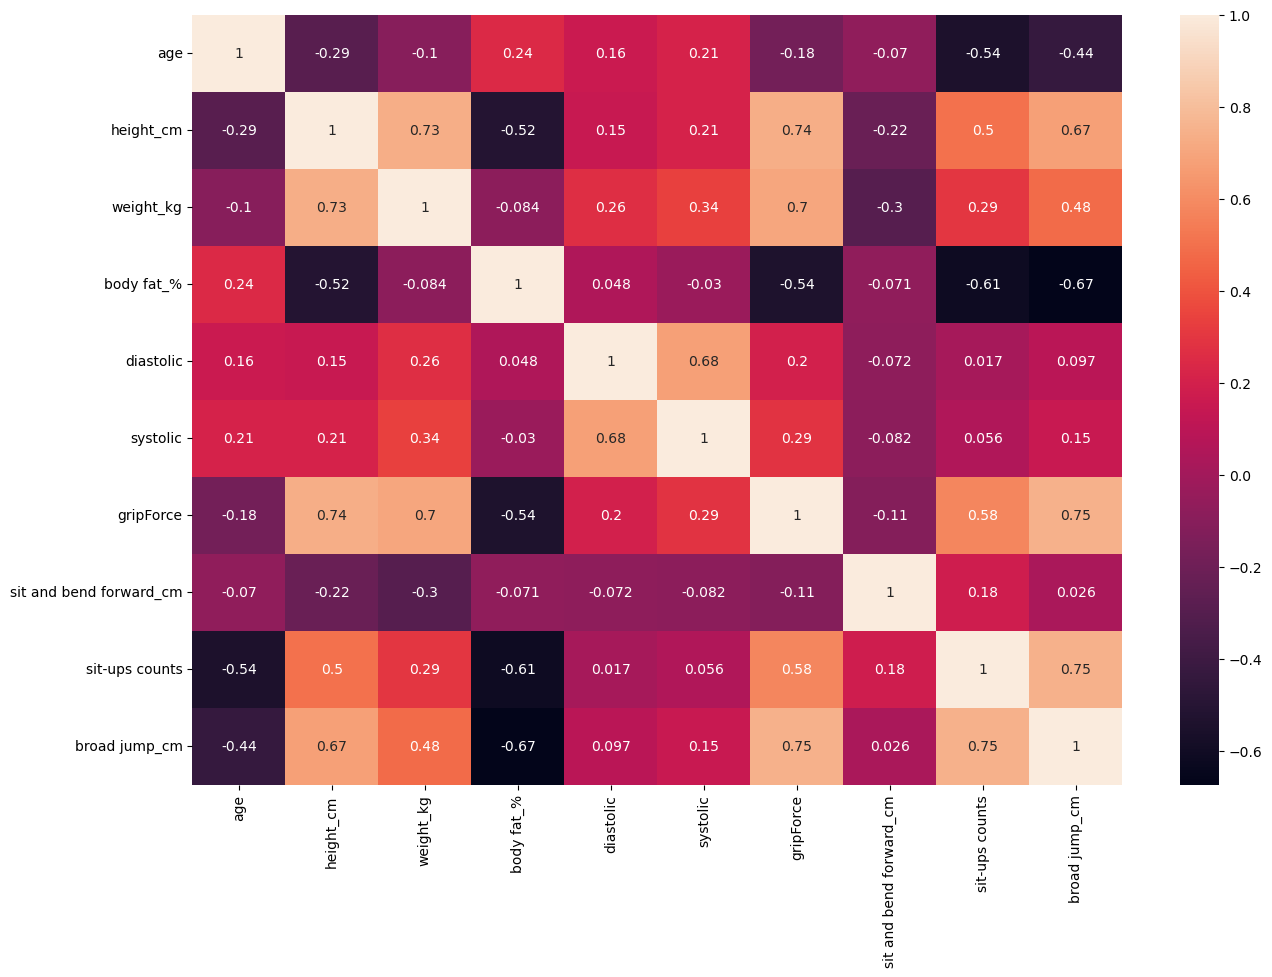

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_numeric_data.corr(), annot=True)

#### Observations
1. Height and Weight are highly correlated
2. Borad Jump and Sit up count is correlated
3. Weight and Grip Force is highly correlated
4. Broad jump and Height is moderately correlated

We can visualize these relationships through a scatterplot

<AxesSubplot: xlabel='Weight', ylabel='Height'>

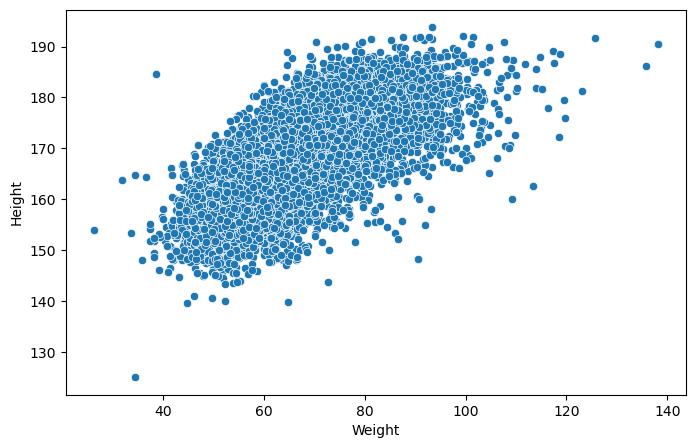

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel("Weight")
ax.set_ylabel("Height")
sns.scatterplot(x="weight_kg", y="height_cm", data=df)

We can see a linear relationship between height and weight of individuals

<AxesSubplot: xlabel='Height in CM', ylabel='Broad Jump in CM'>

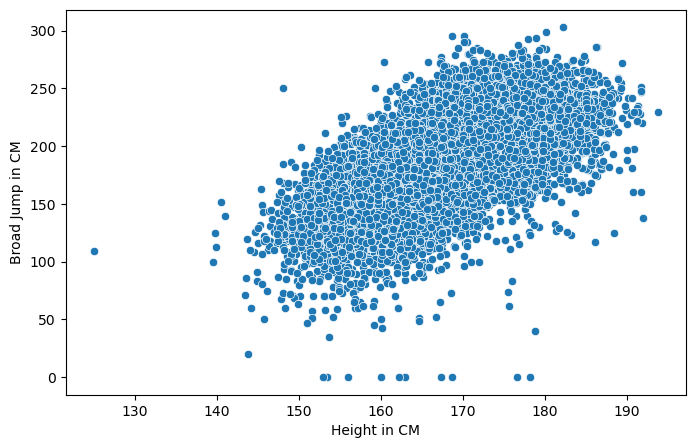

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel("Height in CM")
ax.set_ylabel("Broad Jump in CM")
sns.scatterplot(x="height_cm", y="broad jump_cm", data=df)

We can verify this correlation between the variables through Pearson's colleration coefficient

In [26]:
corr, _ = pearsonr(df["height_cm"], df["broad jump_cm"])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: 0.675


In [27]:
from pandas_profiling import ProfileReport

In [28]:
prof = ProfileReport(df) 
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Finding correlation between gender and class

As we saw above, we have an imbalance between the records of male and female

Since an imbalance would result in an inefficient model, we will test if there is correlation between gender and class

We shall do this by designing a hypothesis test with help of Chi Square Test

H0 - The variables have no association or correlation

H1 - The variables are associated with each other and happen to have a correlation

Sinificance level = 0.05

In [29]:
chisqt = pd.crosstab(df["gender"], df["class"], margins=True)
print(chisqt)

class      A     B     C     D    All
gender                               
F       1484  1185  1112  1145   4926
M       1864  2162  2237  2204   8467
All     3348  3347  3349  3349  13393


In [30]:
from scipy.stats import chi2_contingency 

value = np.array([chisqt.iloc[0][0:6].values,
                  chisqt.iloc[1][0:6].values])
print(chi2_contingency(value)[0:3])

(112.77302615919672, 1.8640534135891744e-23, 4)


With the above results we got a p-value of 1.86 which is greater than 0.05

We will accept our null hypothesis and conclude that the variables have no association or correlation

### Observations after EDA:
1. Our dataset is imbalanced w.r.t gender as we have more than 8000 records of men and lest than 4500 records of women
2. Our target variables are balanced and at equilibrium with each other in terms of frequency
3. We do not have any null values in our data set
4. Ages between 20-35 have more of "Type A" body type whereas ages between 40-60 have more of  "Type D"
5. Correlation:
    1. Height and Weight are highly correlated
    2. Borad Jump and Sit up count is correlated
    3. Weight and Grip Force is highly correlated
    4. Broad jump and Height is moderately correlated

### Creating a baseline model

The model development and the other process would become easier with the baseline model in place

Our baseline model would become a reference to build the model and act as a performance indicator for our original model

We would use the **DummyClassifier()** from sklearn to create a uniform baseline models that would give importance to each target class 

In [59]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

print(
'accuracy:', accuracy_score(y_test, y_pred),
'recall:',  recall_score(y_test, y_pred,average='micro'),
'precision:',  precision_score(y_test, y_pred, average='micro'),
'f1_score:',  f1_score(y_test, y_pred, average='micro'))

accuracy: 0.251131221719457 recall: 0.251131221719457 precision: 0.251131221719457 f1_score: 0.251131221719457


##### The above performance metrics would serve as a benchmark for our main model

**Note:** We can also create an actual ML model and use that as our baseline model

### Preparing data for our Model

In [31]:
y = df["class"]

In [32]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded[["age","height_cm","weight_kg","body fat_%","diastolic","systolic","gripForce","sit and bend forward_cm",
        "sit-ups counts","broad jump_cm","gender_M"]]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Creating our Model
We will use random forest classifier for our multiclass classsification

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 800,
                             min_samples_split = 10,
                             min_samples_leaf = 2,
                             max_features = 'sqrt',
                             max_depth = 30,
                             bootstrap = False)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=800)

In [35]:
predictions = rf.predict(X_test)

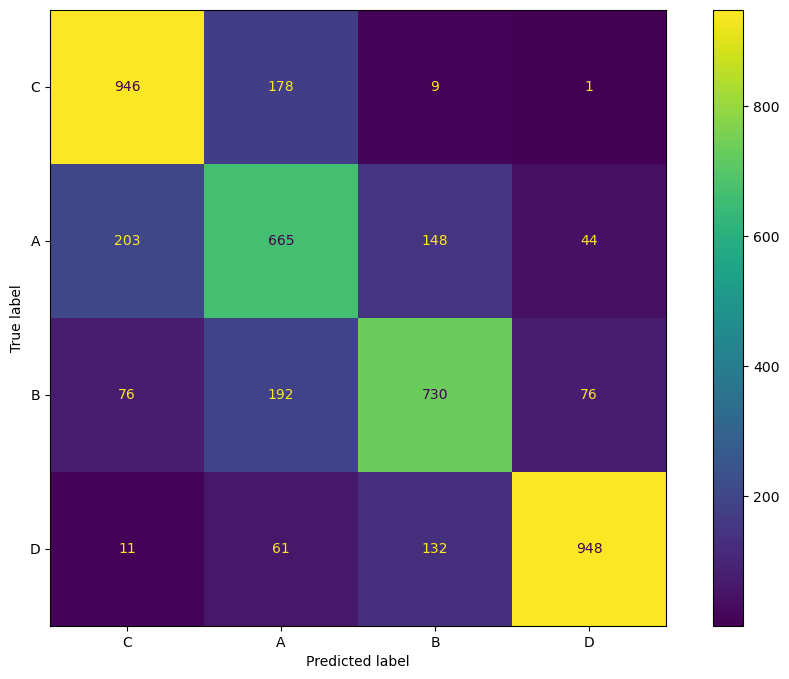

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fig, ax = plt.subplots(figsize=(12, 8))
cm = confusion_matrix(y_test, predictions)
cmp = ConfusionMatrixDisplay(cm, display_labels=df['class'].unique())
cmp.plot(ax=ax)

plt.show();

In [37]:
from sklearn.metrics import roc_auc_score

prediction_probs = rf.predict_proba(X_test)

# Calculate ROC_AUC
roc_auc_score(
    y_test, prediction_probs, multi_class="ovr", average="weighted"
  )


0.9215636881208645

OVR strategy creates an individual classifier for each class in the target. Essentially, each binary classifier chooses a single class and marks it as positive, encoding it as 1. The rest of the classes are considered negative labels and, thus, encoded with 0

Let's alos use the Precision, Recall and F-score metric to determine the effectiveness of our model

In our case, since we want to focus on reducing both False Positives and False Negatives, we will put emphasis on F-score

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=df["class"].unique()))

              precision    recall  f1-score   support

           C       0.77      0.83      0.80      1134
           A       0.61      0.63      0.62      1060
           B       0.72      0.68      0.70      1074
           D       0.89      0.82      0.85      1152

    accuracy                           0.74      4420
   macro avg       0.74      0.74      0.74      4420
weighted avg       0.75      0.74      0.74      4420



In [39]:
#Calculating accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7441176470588236

#### In order to improve our model, let's implement some hyper parameter tuning for Random Forest

In [40]:
from pprint import pprint
#Parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


We will use RandomizedSearchCV for hyper parameter tuning

In [41]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [42]:
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
#                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)

In [43]:
rf_random.best_params_

NameError: name 'rf_random' is not defined

We will now create another Random Forest model with these specific hyper parameters and compare its metrics with our base model

In [ ]:
clf = rf.fit(X_train,y_train)

In [ ]:
predictions_after_tuning = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, predictions_after_tuning)

As we can see, our base model accuracy was 0.7303167420814479 (73%)

After tuning some of the important hyper parameters, we got an accuracy of 0.7418552036199095 (74%)

This is an insignificant increase and helps us little to nothing

##### At this juncture we can try a few different CV techniques like GridSearchCV

What I want to to is try out a different algorithm for creating our prediction model

### Gradient Boost Decision  for our prediction model

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier()

In [45]:
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [47]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           A       0.73      0.82      0.77      1134
           B       0.54      0.59      0.57      1060
           C       0.69      0.62      0.66      1074
           D       0.89      0.80      0.84      1152

    accuracy                           0.71      4420
   macro avg       0.71      0.71      0.71      4420
weighted avg       0.72      0.71      0.71      4420



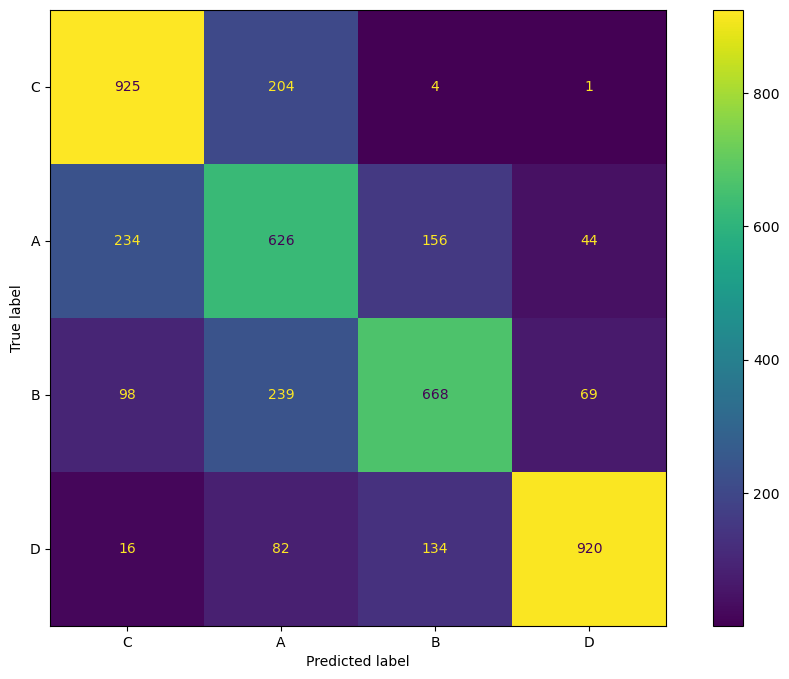

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))
cm_gb = confusion_matrix(y_test, gradient_booster.predict(X_test))
cmp = ConfusionMatrixDisplay(cm_gb, display_labels=df['class'].unique())
cmp.plot(ax=ax)

plt.show();

Gradient Booost accuracy: 0.71 
Random Forest Accuracy: 0.74

As you can see the accuracy for both models is pretty much the same

We can try tuning the hyper parameters or try a different algorithm to further enhance the accuracy 

## Details and Conclusion:

**Source of data:**

Kaggle
https://www.kaggle.com/datasets/kukuroo3/body-performance-data

**Problem Statement:**

Create a machine learning model that can successfully predict the body type of a person based on some of their features like blood pressure, height, weight, physical prowess etc...

**Understanding of dataset:**
1. Used Pearson's Correlation Co-efficient to find out a linear relationship (if exists) between features like body fat percentage and weight, body fat percentage and gender.
2. Identified a  linear relationship between height and weight of individuals
3. No significant outliers detected
4. No null data detected
5. The distribution of each target class is uniform and balanced
6. Plotted trend between age groups and body types: Which age group had the highest number of a particular body type?
7. Used Chi Sqaure test of independence to find out if correlation exists between gender and body type

**Performance Metrics:**

Paid more attention to reduce false negatives i.e. **Recall**

We cannot afford to identify a person as healthy when in reality they are unhealthy. This might lead to irreversible consequences.

For multi-class classification, decision tree ensembles are the best algorithms due to their feature importance technique and ability to deal with multiple classes at once.

Since random forest gave us a slightly better recall percentage, Random Forest Classifier became our final model